### Introduction to visualization

The usual imports and we want to use `PathTreeBuilder` and `MoveTreeBuilder`.

In [1]:
%matplotlib inline
import openpathsampling as paths
from openpathsampling.visualize import PathTreeBuilder, PathTreeBuilder
from IPython.display import SVG, HTML

Let's load some data from our usual suspects the toy simulation.

In [2]:
st = paths.Storage('mstis.nc', mode='r')

Retrieve the move scheme and one of the transitions:

In [3]:
scheme = st.schemes[0]
transition = scheme.network.sampling_transitions[0]

In [4]:
print transition

TISTransition: Out B
B -> B or all states except B
Interface: 0.0<opB<0.04
Interface: 0.0<opB<0.09
Interface: 0.0<opB<0.16



Now build a PathTreeBuilder using the storage with some settings and showing some states.
Blue is `stateA` and should be the first and last frame only unless the trajectory crosses to `stateB`
The Interfaces are indicated by shades of red. 

Finally the number in the snapshot references the stored index of associated configuration holding the coordinates.

In [5]:
tree = PathTreeBuilder(st)
tree.states = {
    'blue': transition.stateA
}

for no, interface in enumerate(transition.interfaces[0:]):
    tree.states['rgb(' + str(no*30) + ',0,0)'] = interface

tree.op = lambda snap : 'B' if snap.reversed else 'F'
tree.op = st.idx
tree.op = None
heritage = tree.construct_heritage(st.samples.last)
tree.set_samples(heritage)
tree.options['settings']['join_blocks'] = False
tree.analyze()

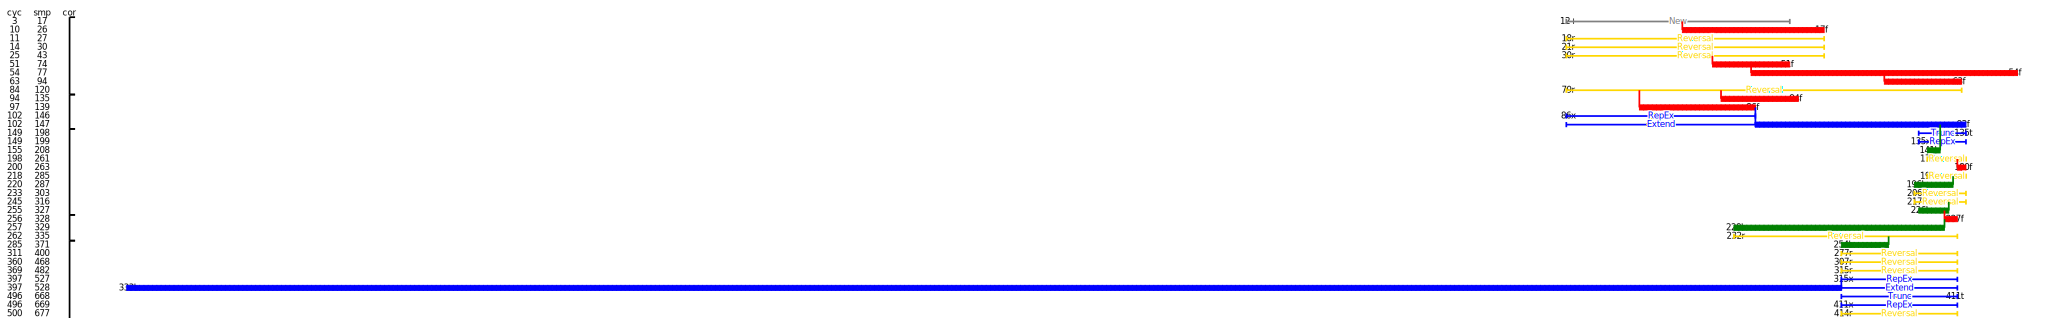

In [6]:
SVG(tree.svg())

Next is the movetreebuilder

In [7]:
movevis = paths.visualize.MoveTreeBuilder(st)

This shows the full movepath of all steps (right now this disables and only shows the first step!)

In [10]:
movevis.set_ensembles(scheme.ensembles_for_move_tree())
movevis.set_mover(scheme.root_mover)

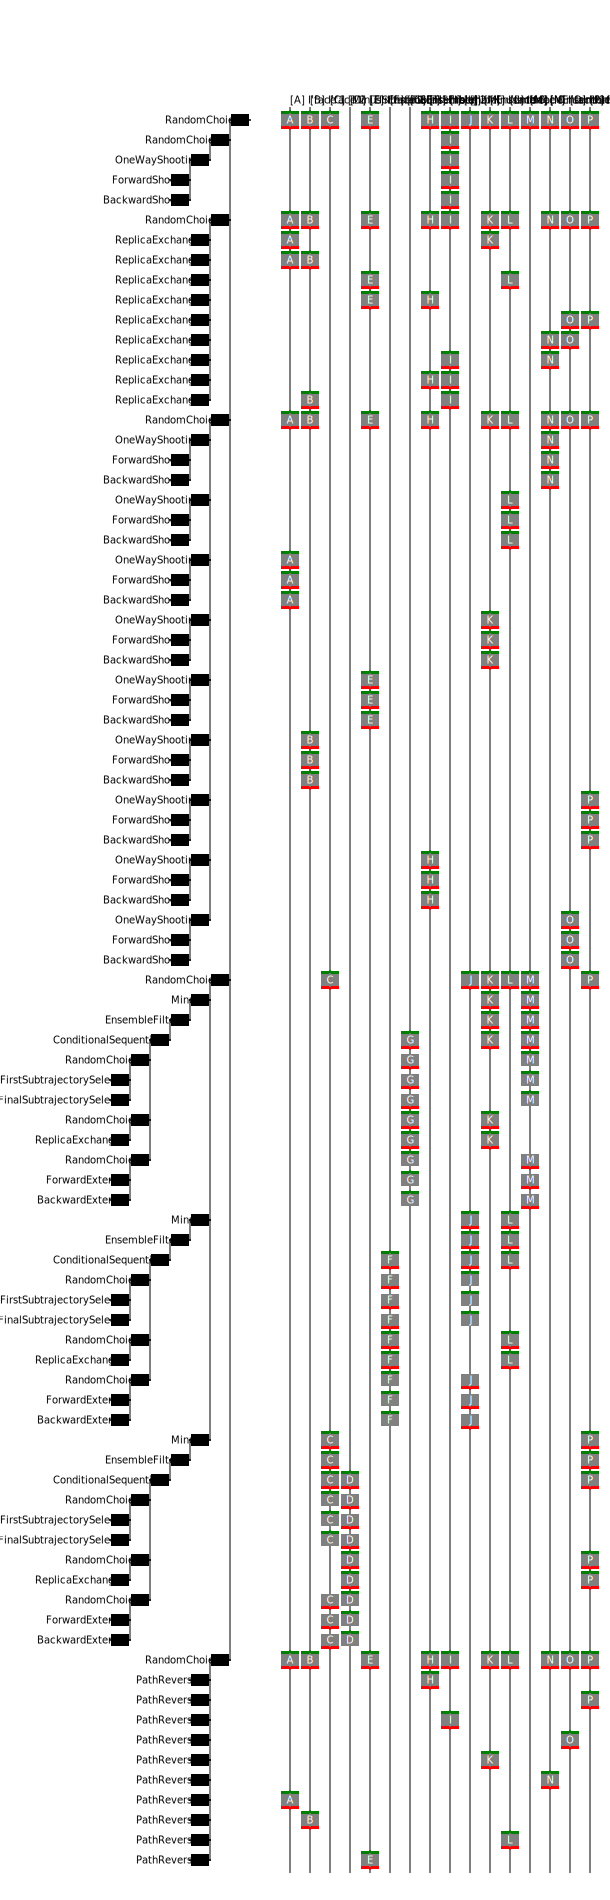

In [11]:
SVG(movevis.svg())

In [10]:
scheme.root_mover.depth_pre_order(lambda this: this, only_canonical=False)

[(0, <openpathsampling.pathmover.RandomChoiceMover at 0x1054720d0>),
 (1, <openpathsampling.pathmover.RandomChoiceMover at 0x122f577d0>),
 (2, <openpathsampling.pathmover.OneWayShootingMover at 0x10c048290>),
 (3, <openpathsampling.pathmover.ForwardShootMover at 0x122f34190>),
 (3, <openpathsampling.pathmover.BackwardShootMover at 0x122f61590>),
 (1, <openpathsampling.pathmover.RandomChoiceMover at 0x122f65fd0>),
 (2, <openpathsampling.pathmover.ReplicaExchangeMover at 0x122f611d0>),
 (2, <openpathsampling.pathmover.ReplicaExchangeMover at 0x122f61250>),
 (2, <openpathsampling.pathmover.ReplicaExchangeMover at 0x122f34150>),
 (2, <openpathsampling.pathmover.ReplicaExchangeMover at 0x122f5dcd0>),
 (2, <openpathsampling.pathmover.ReplicaExchangeMover at 0x122f61c90>),
 (2, <openpathsampling.pathmover.ReplicaExchangeMover at 0x122f65490>),
 (2, <openpathsampling.pathmover.ReplicaExchangeMover at 0x122f65d90>),
 (2, <openpathsampling.pathmover.ReplicaExchangeMover at 0x122f68d10>),
 (2, <o

Next display a Mover (the structure of possible moves, not the concrete realization during a simulation!)

and display it and show which of the RETIS ensembles are used in which mover

In [10]:
all_ensembles = [transition.minus_ensemble._segment_ensemble, transition.minus_ensemble] + transition.ensembles

In [28]:
movevis.mover(scheme.root_mover, all_ensembles)
view = movevis.renderer
view.zoom = 1.5
view.scale_y = 18
view.scale_th = 20
view.font_size = 0.4
SVG(view.to_svg())

AttributeError: 'MoveTreeBuilder' object has no attribute 'mover'

This is experimental D3 support. 

In [33]:
vis = paths.visualize.MoveTreeNX(scheme.root_mover)

In [34]:
HTML(vis.d3vis())

Goal should be to have a dynamic view on what is happening, like an automatically updated movetree or showing which mover is currently used. Using the capabilities of D3 this should be quite easy.